# Tolerance Intervals

In [1]:
# parametric tolerance interval
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm

# seed the random number generator
seed(1)

# generate dataset
data = 5 * randn(100) + 50

# specify degrees of freedom
n = len(data)
dof = n - 1

# specify data coverage
prop = 0.95
prop_inv = (1.0 - prop) / 2.0
gauss_critical = norm.ppf(prop_inv)
print('Gaussian critical value: %.3f (coverage=%d%%)' % (gauss_critical, prop*100))

# specify confidence
prob = 0.99
prop_inv = 1.0 - prob
chi_critical = chi2.ppf(prop_inv, dof)
print('Chi-Squared critical value: %.3f (prob=%d%%, dof=%d)' % (chi_critical, prob*100, dof))

# tolerance
interval = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)
print('Tolerance Interval: %.3f' % interval)

# summarize
data_mean = mean(data)
lower, upper = data_mean-interval, data_mean+interval
print('%.2f to %.2f covers %d%% of data with a confidence of %d%%' % (lower, upper, prop*100, prob*100))

Gaussian critical value: -1.960 (coverage=95%)
Chi-Squared critical value: 69.230 (prob=99%, dof=99)
Tolerance Interval: 2.355
47.95 to 52.66 covers 95% of data with a confidence of 99%


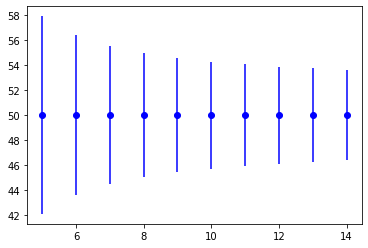

In [2]:
# plot tolerance interval vs sample size
from numpy.random import seed
from numpy.random import randn
from numpy import sqrt
from scipy.stats import chi2
from scipy.stats import norm
from matplotlib import pyplot

# seed the random number generator
seed(1)


# sample sizes
sizes = range(5,15)
for n in sizes:

    # generate dataset
	data = 5 * randn(n) + 50

    # calculate degrees of freedom
	dof = n - 1

    # specify data coverage
	prop = 0.95
	prop_inv = (1.0 - prop) / 2.0
	gauss_critical = norm.ppf(prop_inv)

    # specify confidence
	prob = 0.99
	prop_inv = 1.0 - prob
	chi_critical = chi2.ppf(prop_inv, dof)

    # tolerance
	tol = sqrt((dof * (1 + (1/n)) * gauss_critical**2) / chi_critical)

    # plot
	pyplot.errorbar(n, 50, yerr=tol, color='blue', fmt='o')

# plot results
pyplot.show()